# Проект по дисциплине "Машинное обучение"
### Трефилов Дмитрий Александрович ИАУП-22
Датасет для проекта содержит распарсенные данные о квартирах в разных регионах в количестве 10000 записей с сайта Циан.

В распарсенной таблице присутствуют такие поля:
CIANID - уникальный номер объявления на сайте
ID - URL
HOUSE_ID_ACV2 - уникальный номер адреса
STATUS - статус
PRICE_SQM - цена кв. м
BARGAINTERMS_PRICE - цена
BARGAINTERMS_PRICE_START - цена старта
BARGAINTERMS_PRICE_MAX - цена максимальная
BARGAINTERMS_PRICE_MIN - цена минимальная
BARGAINTERMS_CURRENCY - валюта цены
CREATIONDATE - дата создания
LAST_ACTIVITY_DATE - дата последнего действия
CLOSING_REASON - причина снятия
BARGAINTERMS_SALETYPE - тип договора
GEO_JK_NAME - название ЖК
GEO_JK_ID - уникальный номер ЖК
GEO_JK_HOUSE_NAME - название корпуса
GEO_JK_HOUSE_ID - уникальный номер корпуса
ROOMSCOUNT - число комнат
TOTALAREA - площадь общая
LIVINGAREA - площадь жилая
KITCHENAREA - площадь кухни
FLOORNUMBER - этаж
JK_HOUSE_FLAT_SECTIONNUMBER - секция
JK_HOUSE_FLAT_FLATNUMBER - номер на этаже
JK_HOUSE_FLAT_FLATTYPE - тип помещения
DECORATION - отделка
REPAIRTYPE - ремонт
COMBINEDWCSCOUNT - санузлов совмещенных
SEPARATEWCSCOUNT - санузлов раздельных
BALCONIESCOUNT - балконов
LOGGIASCOUNT - лоджий
ALLROOMSAREA - метражи комнат
UNDERGROUNDS_NAME_0 - метро
UNDERGROUNDS_TIME_0 - метро время
UNDERGROUNDS_TRANSPORTTYPE_0 - метро тип доступности
ISAPARTMENTS - апартамент
ISPENTHOUSE - пентхаус
PUBLISHEDUSERID - уникальный номер продавца
GEO_LAT - широта
GEO_LNG - долгота
ACV_GEO_GOROD - город
ACV_GEO_GOROD_RAW - городской округ города
ACV_GEO_HOUSE - номер дома
ACV_GEO_REGION - регион
ACV_GEO_STREET - улица
ACV_GEO_RAION_REGIONA - элемент АТД 1 уровня региона
ACV_GEO_DIS_MIKRORAION - микрорайон
ACV_GEO_DIS_OKRUG_HUMAN - элемент АТД 1 уровня города
ACV_GEO_DIS_RAION_HUMAN - элемент АТД 2 уровня города
ISQUALIFY - объявление квалифицированное
ISDUPLICATED - объявление дубль
ISPRICEQUALIFY - объявление квалифицированное по цене

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Files/data_to_project.csv', encoding='utf-8', delimiter=',')
df.head(5)

,cianid,id,house_id_acv2,status,price_sqm,bargainterms_price,bargainterms_price_start,bargainterms_price_max,bargainterms_price_min,bargainterms_currency,...,acv_geo_house,acv_geo_region,acv_geo_street,acv_geo_raion_regiona,acv_geo_dis_mikroraion,acv_geo_dis_okrug_human,acv_geo_dis_raion_human,isqualify,isduplicated,ispricequalify
0,248144206,248144206,6493046.0,Published,151215,8536067.0,8536067.0,8536067.0,8536067.0,rur,...,к16,Московская,Миниполис Дивное ЖК,Ленинский городской округ,NaN,NaN,NaN,True,False,True
1,248154196,248154196,NaN,Deleted,174000,NaN,NaN,NaN,NaN,rur,...,NaN,Москва,Люблинская,NaN,NaN,ЮВАО,Люблино,False,False,True
2,248154209,248154209,NaN,Deleted,174000,NaN,NaN,NaN,NaN,rur,...,NaN,Москва,Люблинская,NaN,NaN,ЮВАО,Люблино,False,False,True
3,248154239,248154239,NaN,Deleted,189000,NaN,NaN,NaN,NaN,rur,...,NaN,Москва,Люблинская,NaN,NaN,ЮВАО,Люблино,False,False,True
4,248154268,248154268,NaN,Deleted,150000,NaN,NaN,NaN,NaN,rur,...,NaN,Москва,Люблинская,NaN,NaN,ЮВАО,Люблино,False,False,True


Создадим новый датасет для предсказания стоимости квартиры

In [3]:
df_new = df[['bargainterms_price', 'roomscount', 'totalarea', 'floornumber', 'isapartments', 'ispenthouse', 'acv_geo_region']]
df_new.head(5)

,bargainterms_price,roomscount,totalarea,floornumber,isapartments,ispenthouse,acv_geo_region
0,8536067.0,2.0,56.45,1,False,NaN,Московская
1,NaN,1.0,44.43,3,False,False,Москва
2,NaN,1.0,44.43,7,False,False,Москва
3,NaN,NaN,28.48,13,False,False,Москва
4,NaN,2.0,66.18,16,False,False,Москва


In [4]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bargainterms_price  9867 non-null   float64
 1   roomscount          8592 non-null   float64
 2   totalarea           10000 non-null  float64
 3   floornumber         10000 non-null  int64  
 4   isapartments        9776 non-null   object 
 5   ispenthouse         675 non-null    object 
 6   acv_geo_region      10000 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 547.0+ KB


In [5]:
df_new=df_new.dropna(subset=['bargainterms_price']) #убираем все пустые значения
df_new.loc[df_new['isapartments'].isna(), 'isapartments']=0 #заменяем пустые значения на 0 - не апартаменты
df_new.loc[df_new['ispenthouse'].isna(), 'ispenthouse']=0 #заменяем пустые значения на 0 - не пентхаус
df_new.loc[df_new['roomscount'].isna(), 'roomscount']=1 #заменяем пустые значения на 1 - так как в квартире может быть минимум одна комната
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9867 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bargainterms_price  9867 non-null   float64
 1   roomscount          9867 non-null   float64
 2   totalarea           9867 non-null   float64
 3   floornumber         9867 non-null   int64  
 4   isapartments        9867 non-null   object 
 5   ispenthouse         9867 non-null   object 
 6   acv_geo_region      9867 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 616.7+ KB


In [6]:
df_new['bargainterms_price'] = df_new['bargainterms_price'] / 1000 # приведем цену к тысячам рублей

In [7]:
df_new.loc[(df_new['isapartments']==False), 'isapartments']=0 # заменим логические операторы на их цифровые аналоги
df_new.loc[(df_new['isapartments']==True), 'isapartments']=1
df_new.loc[(df_new['ispenthouse']==False), 'ispenthouse']=0
df_new.loc[(df_new['ispenthouse']==True), 'ispenthouse']=1
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9867 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bargainterms_price  9867 non-null   float64
 1   roomscount          9867 non-null   float64
 2   totalarea           9867 non-null   float64
 3   floornumber         9867 non-null   int64  
 4   isapartments        9867 non-null   object 
 5   ispenthouse         9867 non-null   object 
 6   acv_geo_region      9867 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 616.7+ KB


In [8]:
df_new['roomscount'] = df_new['roomscount'].astype(int) # приведем колонки к целому типу
df_new['floornumber'] = df_new['floornumber'].astype(int)
df_new['isapartments'] = df_new['isapartments'].astype(int)
df_new['ispenthouse'] = df_new['ispenthouse'].astype(int)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9867 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bargainterms_price  9867 non-null   float64
 1   roomscount          9867 non-null   int32  
 2   totalarea           9867 non-null   float64
 3   floornumber         9867 non-null   int32  
 4   isapartments        9867 non-null   int32  
 5   ispenthouse         9867 non-null   int32  
 6   acv_geo_region      9867 non-null   object 
dtypes: float64(2), int32(4), object(1)
memory usage: 462.5+ KB


Разделим колонку регион на множество столбцов с 0 и 1

In [9]:
# применяем метод get_dummies() к столбцу acv_geo_region
dummies = pd.get_dummies(df_new['acv_geo_region'])

# объединяем исходный датафрейм и бинарные столбцы
df_new = pd.concat([df_new, dummies], axis=1)

# удаляем столбец который нам больше не нужен
df_new = df_new.drop('acv_geo_region', axis=1)

df_new.head(5)

,bargainterms_price,roomscount,totalarea,floornumber,isapartments,ispenthouse,Кемеровская,Москва,Московская,Мурманская,Нижегородская,Орловская,Пермский,Санкт-Петербург,Тамбовская
0,8536.067,2,56.45,1,0,0,0,0,1,0,0,0,0,0,0
28,10003.950,3,70.95,16,0,0,0,1,0,0,0,0,0,0,0
41,6548.620,1,36.79,10,0,0,0,1,0,0,0,0,0,0,0
44,6265.800,1,34.81,15,0,0,0,1,0,0,0,0,0,0,0
46,6237.120,1,35.04,7,0,0,0,1,0,0,0,0,0,0,0


Посмотрим на выбросы

In [10]:
import matplotlib.pyplot as plt

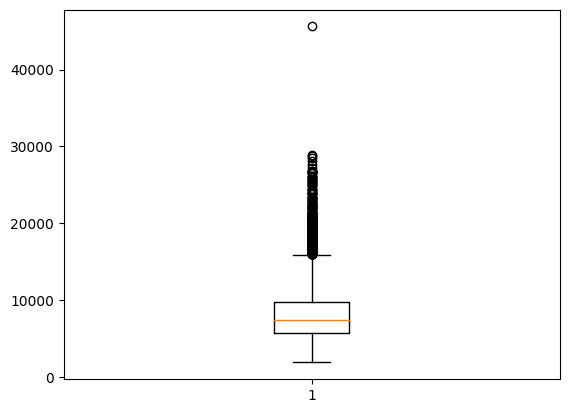

In [11]:
plt.boxplot(df_new['bargainterms_price'])
plt.show()

Так как выбросов очень много, то избавимся от них

In [12]:
# Вычисляем верхнюю и нижнюю границы межквартильного диапазона
q1 = df_new["bargainterms_price"].quantile(0.25)
q3 = df_new["bargainterms_price"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1 * iqr
upper_bound = q3 + 1 * iqr

# Очищаем DataFrame от выбросов
df_new = df_new[(df_new["bargainterms_price"] > lower_bound) & (df_new["bargainterms_price"] < upper_bound)]

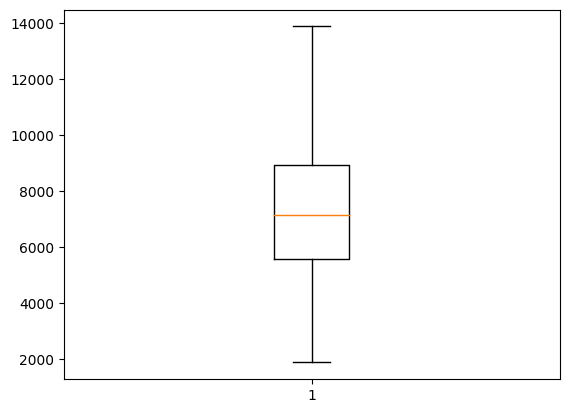

In [13]:
plt.boxplot(df_new['bargainterms_price']) # снова смотрим на наличие выбросов
plt.show()

Так как больше не осталось выбросов, то решаю задачу регрессии, так как хочу предсказать стоимость квартиры исходя из ее параметров.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [15]:
# делим признаки и ответ на разные выборки, после чего данные делим на тестовые и обучающие
X = df_new[['roomscount', 'totalarea', 'floornumber', 'isapartments', 'ispenthouse', 'Кемеровская', 'Москва', 'Московская', 'Мурманская', 'Нижегородская', 'Орловская', 'Пермский', 'Санкт-Петербург', 'Тамбовская']]
y = df_new.bargainterms_price
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
model = LinearRegression().fit(x_train, y_train)

In [17]:
y_pred = model.predict(x_test)

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [19]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mse**(1/2)
print('rmse: %.3f, mae: %.3f' % (rmse, mae))

rmse: 1054.666, mae: 741.317


Результаты модели получились следующие: абсолютная ошибка предсказания составляет почти 741.3 тыс. руб., а средний квадрат ошибки около 1054.7 тыс. руб. Такая разница в цене очень весома для потенциальных покупателей квартир, поэтому, скорее всего, есть смысл рассмотреть другие модели, чтобы попробовать улучшить результаты.